# 911 Calls Data Analysis

Will be analyzing a 911 call data from Kaggle(https://www.kaggle.com/mchirico/montcoalert).

In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [29]:
df = pd.read_csv('911.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [31]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# 

# Basic Questions

In [32]:
# Top five zipcodes for 911 calls.
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [33]:
# Top 5 townships for 911 calls
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [34]:
# How many unique title codes
df['title'].nunique()

110

# Restructuring the Data

In [42]:
# Breaking the title column up into 2 different columns; Reason and Department
df['Reason'] = df['title'].apply(lambda title: title.split(':')[1])
df['Department'] = df['title'].apply(lambda title: title.split(':')[0])
df.drop('title', axis = 1, inplace = True)
df.head()

,lat,lng,desc,zip,timeStamp,twp,addr,e,Reason,Department
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS


In [173]:
type(df['timeStamp'][0])

str

In [176]:
# convert timeStamp from a string to a DateTime Object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [178]:
# creating columns for Hour, Day of the week, Month, and year 
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Day Of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Year'] = df['timeStamp'].apply(lambda time: time.year)
df.head()

,lat,lng,desc,zip,timeStamp,twp,addr,e,Reason,Department,Hour,Day Of Week,Month,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,3,12,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,3,12,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,17,3,12,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,17,3,12,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,17,3,12,2015


In [179]:
# Mapping string names to day of week
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['Day Of Week'] = df['Day Of Week'].map(dmap)
df.head()

,lat,lng,desc,zip,timeStamp,twp,addr,e,Reason,Department,Hour,Day Of Week,Month,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,Thur,12,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,Thur,12,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,17,Thur,12,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,17,Thur,12,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,17,Thur,12,2015


# Exploratory Analysis & Visualization  

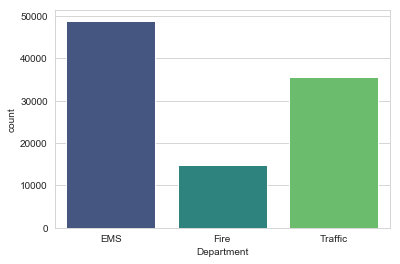

In [184]:
# Countplot of 911 calls by Department
sns.countplot(x = 'Department', data = df, palette = 'viridis')

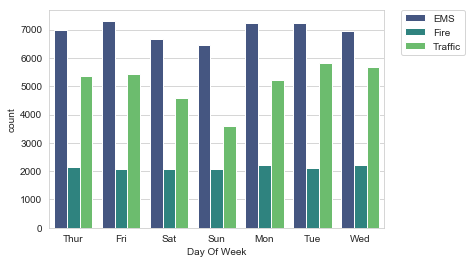

In [186]:
# Countplot of 911 calls by Day of the Week 
sns.countplot(x = 'Day Of Week', data = df, hue = 'Department', palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

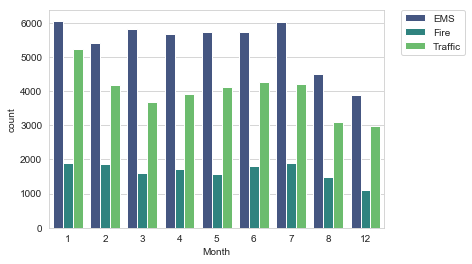

In [187]:
# Countplot fof 911 calls by month
sns.countplot(x = 'Month', data = df, hue = 'Department', palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

In [189]:
# We are missing some months on our x-axis. Going to fill in the missing data by using a line plot.
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,timeStamp,twp,addr,e,Reason,Department,Hour,Day Of Week,Year
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7963,7916,7969,7969,7969,7969,7969,7969


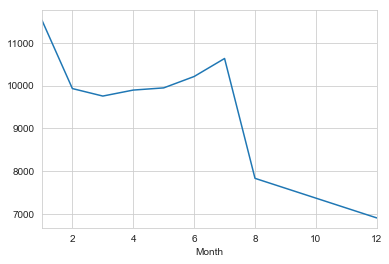

In [193]:
# You can use any column
byMonth['zip'].plot()

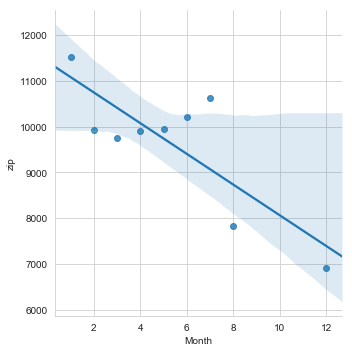

In [195]:
# See if we can find a linear realationship between the month and the zip code
sns.lmplot(x = 'Month', y = 'zip', data = byMonth.reset_index())

In [205]:
# Graphing 911 calls by date
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

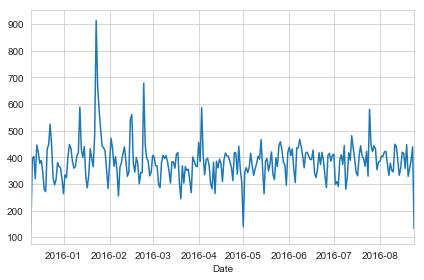

In [209]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

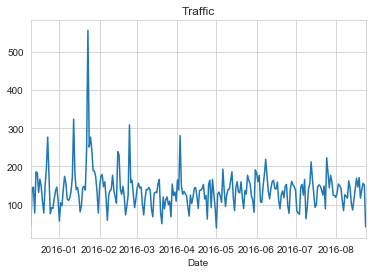

In [210]:
# Graph based off of traffic accidents
df[df['Department'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

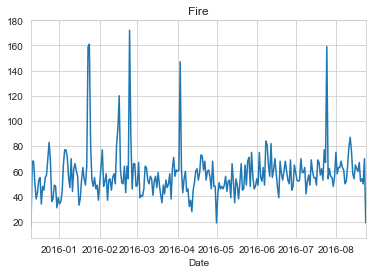

In [211]:
# Graph based of fire accidents
df[df['Department'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

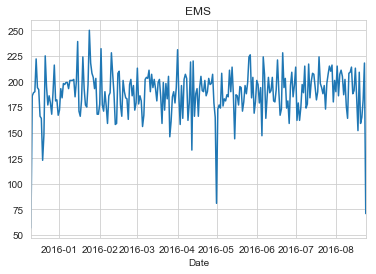

In [214]:
# EMS
df[df['Department'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout

In [218]:
# Checking correlation between all variables
df.corr()

,lat,lng,zip,e,Hour,Month,Year
lat,1.000000,-0.199432,-0.245963,NaN,-0.002966,-0.010716,-0.004918
lng,-0.199432,1.000000,-0.508580,NaN,-0.007088,0.011319,-0.002804
zip,-0.245963,-0.508580,1.000000,NaN,0.006924,-0.005482,0.002587
e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,-0.002966,-0.007088,0.006924,NaN,1.000000,0.017841,-0.016864
Month,-0.010716,0.011319,-0.005482,NaN,0.017841,1.000000,-0.687382
Year,-0.004918,-0.002804,0.002587,NaN,-0.016864,-0.687382,1.000000


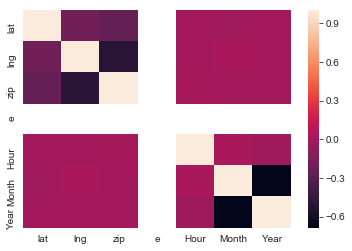

In [217]:
sns.heatmap(df.corr())

In [221]:
# Correlation between Day of week and Hour
dayHour = df.groupby(['Day Of Week', 'Hour']).count()['Department'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day Of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thur,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


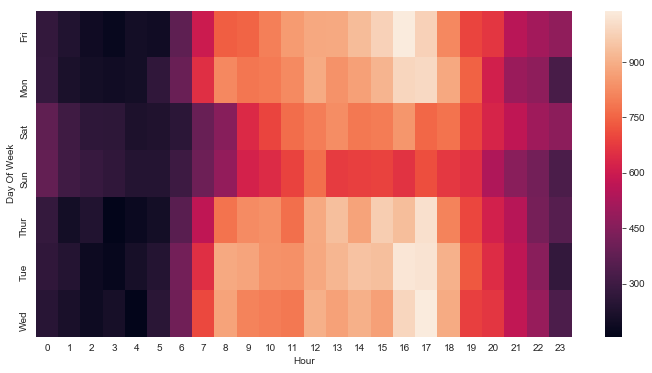

In [223]:
plt.figure(figsize = (12, 6))
sns.heatmap(dayHour)

In [224]:
# correlation between Day of Week and Month
dayMonth = df.groupby(['Day Of Week', 'Month']).count()['Department'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day Of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thur,1584,1596,1900,1601,1590,2065,1646,1230,1266


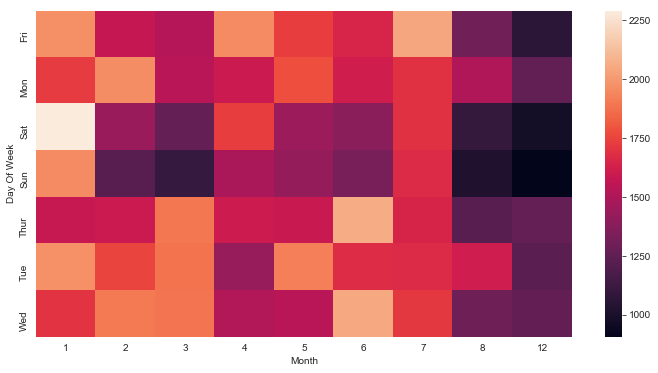

In [225]:
plt.figure(figsize = (12, 6))
sns.heatmap(dayMonth)